## Form SIDARTHE-V model

In [5]:
using Catlab, AlgebraicPetri, Catlab.CategoricalAlgebra, ModelingToolkit
using AlgebraicPetri.SubACSets

In [6]:
using EasyModelAnalysis, SBML, SBMLToolkit, UnPack, Test


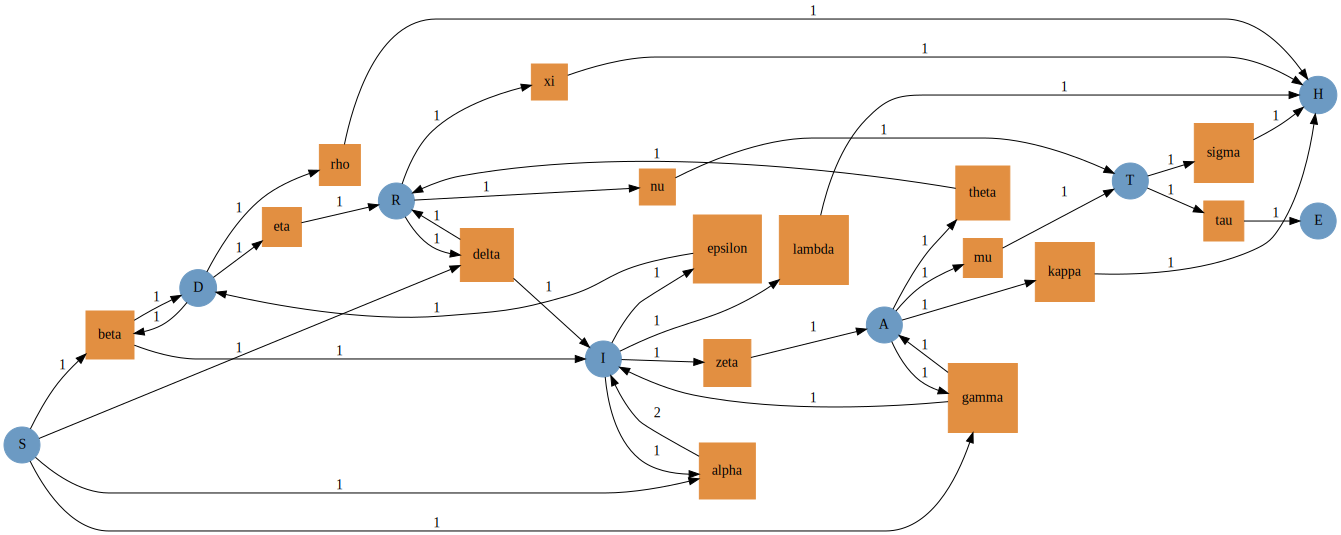

In [9]:
import Graphviz_jll
sidarthe_v = read_json_acset(LabelledPetriNet, "sidarthe_v.json")
sidarthe = read_json_acset(LabelledPetriNet, "sidarthe.json")

mca_sidarthe_v = mca(sidarthe, sidarthe_v)
AlgebraicPetri.Graph(mca_sidarthe_v[1])

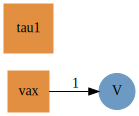

In [10]:
sidarthe_sub = Subobject(sidarthe_v,
                         S = parts(sidarthe, :S),
                         T = parts(sidarthe, :T),
                         I = parts(sidarthe, :I),
                         O = parts(sidarthe, :O))
AlgebraicPetri.Graph(dom(hom(negate(sidarthe_sub))))

In [11]:
sysv = ODESystem(sidarthe_v)
u0valsv = [u0vals; 0.0]  # 0 vaccinated initially
@unpack beta, gamma, delta, alpha, epsilon, kappa, sigma, rho, xi, mu, tau1, tau2, lambda, eta, nu, zeta, theta, vax = sysv
phi = vax
p_map = Dict([parameters(sys) .=> paramvals
              tau2 => defaultsmap[tau]
              tau1 => defaultsmap[tau] / 3
              vax => 0.0])
sts_map = Dict(states(sysv) .=> u0valsv)
using ModelingToolkit: @set!
defs_v2 = merge(sts_map, p_map)
@set! sysv.defaults = defs_v2
sysv = complete(sysv)

LoadError: UndefVarError: u0vals not defined